In [2]:
import s3fs
import hvac
import os

client = hvac.Client(url='https://vault.lab.sspcloud.fr',
                     token=os.environ['VAULT_TOKEN'])
secret = os.environ['VAULT_MOUNT'] + os.environ['VAULT_TOP_DIR'] + '/s3_creds'
mount_point, secret_path = secret.split('/', 1)
secret_dict = client.secrets.kv.read_secret_version(path=secret_path, mount_point = mount_point)
os.environ["AWS_ACCESS_KEY_ID"] = secret_dict['data']['data']['ACCESS_KEY']
os.environ["AWS_SECRET_ACCESS_KEY"] = secret_dict['data']['data']['SECRET_KEY']
try:
    del os.environ['AWS_SESSION_TOKEN']
except KeyError:
    pass

In [3]:
import pickle

fs = s3fs.S3FileSystem(client_kwargs={'endpoint_url': 'https://minio.lab.sspcloud.fr'})
with fs.open("s3://projet-extraction-tableaux/data/df_trainrf.pickle", 'rb') as f:
    df = pickle.load(f)

In [4]:
df

,siren,pagenumber,text,tableau_f_et_p,accOCR,tableauPDF
0,5820378,1,RCS : AMIENS Code greffe : 8002 Documents comp...,0,"85,7764666501213",1
1,5820378,2,GREFFE DU TRIBUNAL DE COMMERCE …… D'AMIENS Dat...,0,"91,6485136349996",1
2,5820378,3,...,0,NaN,1
3,5820378,4,...,0,NaN,1
4,5820378,5,...,0,NaN,1
...,...,...,...,...,...,...
34906,998823504,45,4.9. Analyse et échéance des dettes\r\r\n...,0,NaN,1
34907,998823504,46,- de remboursement de pénalités et intérêts...,0,NaN,1
34908,998823504,47,6.2.2. ...,0,NaN,1
34909,998823504,48,ADECCO FRANCE Société par actions simplifiée a...,0,"91,7648922486163",1


In [5]:
df.siren.nunique()

490

In [6]:
import numpy as np

np.flip(df.siren.unique()[250:])

array([998823504, 969201532, 957504061, 956500367, 954506077, 925520108,
       879443539, 864801527, 858200611, 855200887, 852535657, 850581224,
       850406000, 847893658, 846780088, 845750496, 844725507, 844718478,
       842947764, 834268559, 834032310, 833916802, 833908635, 831682950,
       830436101, 829128768, 827719782, 825130289, 824548101, 824545297,
       824152524, 823902002, 819374463, 818785776, 817389604, 815257134,
       815255773, 814870853, 814030508, 813836756, 812869170, 812746568,
       812404010, 808636054, 804363521, 803020031, 802093633, 802046185,
       801602681, 800509689, 799378591, 799234364, 799144399, 799098439,
       798434841, 798333415, 797506599, 797506581, 797080850, 794661470,
       794124818, 793148669, 790953384, 790256671, 790212351, 790121784,
       790084149, 790052997, 788268407, 784393530, 784173536, 780129987,
       780060711, 778147801, 775673031, 775670417, 775563232, 752149914,
       752026187, 751927534, 750989220, 750635427, 

In [82]:
np.flip(df.siren.unique())

array([998823504, 969201532, 957504061, 956500367, 954506077, 925520108,
       879443539, 864801527, 858200611, 855200887, 852535657, 850581224,
       850406000, 847893658, 846780088, 845750496, 844725507, 844718478,
       842947764, 834268559, 834032310, 833916802, 833908635, 831682950,
       830436101, 829128768, 827719782, 825130289, 824548101, 824545297,
       824152524, 823902002, 819374463, 818785776, 817389604, 815257134,
       815255773, 814870853, 814030508, 813836756, 812869170, 812746568,
       812404010, 808636054, 804363521, 803020031, 802093633, 802046185,
       801602681, 800509689, 799378591, 799234364, 799144399, 799098439,
       798434841, 798333415, 797506599, 797506581, 797080850, 794661470,
       794124818, 793148669, 790953384, 790256671, 790212351, 790121784,
       790084149, 790052997, 788268407, 784393530, 784173536, 780129987,
       780060711, 778147801, 775673031, 775670417, 775563232, 752149914,
       752026187, 751927534, 750989220, 750635427, 

In [80]:
np.flip(df.siren.unique())[250:]

array([480108000, 479510364, 479438574, 479292856, 479049595, 478826555,
       478613169, 477828495, 456500537, 451443618, 451194435, 450856075,
       450639505, 445115462, 444714380, 444692990, 444502777, 443975735,
       443685573, 443660618, 443567557, 442617965, 442233789, 441639465,
       441133808, 440708634, 440475887, 440453678, 440325447, 440313765,
       440251130, 440187227, 440006153, 439857343, 438692626, 438311961,
       437991623, 437972391, 435480132, 435166285, 434325973, 434057261,
       433909132, 433677721, 433332996, 433002011, 432766947, 432604338,
       429790082, 428764682, 428723316, 428661367, 428593230, 428575443,
       428571186, 428569214, 428221170, 425100294, 425095882, 424764215,
       424722130, 423656628, 423329416, 422348565, 422288092, 422281766,
       421892084, 421827783, 421422981, 421340084, 421266271, 421259615,
       421199274, 421100645, 421023870, 421013731, 420916918, 420499311,
       420462046, 419838529, 418358388, 414811968, 

En vrai il faut aussi tout re-ocriser..

In [7]:
list(df[(df.siren == 572211704) & (df.pagenumber == 63)].text)

['A-Filiales B-Participations C-Autres participations Total 0 0 0 0 0 0 0 0 Page 31 de 31 1 Pour copie certifiée conforme délivrée le 21/07/2020 1730 SISs Page 62 sur 62 N° de dépôt - 2020/21349 / 5572211704']

In [60]:
df[(df.siren == 487607574) & (df.tableau_f_et_p == 1)]

,siren,pagenumber,text,tableau_f_et_p,accOCR,tableauPDF


In [61]:
labels_dict = {}

In [62]:
labels_dict["517865390"] = []
labels_dict["517441820"] = []
labels_dict["514367978"] = []
labels_dict["513249557"] = []
labels_dict["512229907"] = []
labels_dict["511248742"] = []
labels_dict["510339609"] = []
labels_dict["509419818"] = []
labels_dict["509352951"] = []
labels_dict["508994092"] = []
labels_dict["507604106"] = []
labels_dict["505197848"] = [26, 55]
labels_dict["504592528"] = []
labels_dict["504574823"] = []
labels_dict["504033796"] = []
labels_dict["503880551"] = [] # 17, 40 ? mais pas vraiment
labels_dict["503827388"] = [32] # check OCR
labels_dict["503801680"] = []
labels_dict["501980593"] = []
labels_dict["501659312"] = []
labels_dict["501651616"] = [38]
labels_dict["501537831"] = []
labels_dict["501474795"] = []
labels_dict["501472492"] = [23, 46] # check OCR
labels_dict["501378582"] = [30, 64]
labels_dict["501233563"] = []
labels_dict["501193171"] = [45] # check OCR
labels_dict["500563606"] = [23, 48]
labels_dict["500170246"] = []
labels_dict["498873884"] = []
labels_dict["498418151"] = []
labels_dict["498222629"] = []
labels_dict["498164755"] = []
labels_dict["497631333"] = []
labels_dict["494963788"] = []
labels_dict["493636039"] = [11]
labels_dict["493467591"] = [17, 38]
labels_dict["493349849"] = [14, 33]
labels_dict["493264790"] = []
labels_dict["493264733"] = [17]
labels_dict["493255749"] = []
labels_dict["493213870"] = []
labels_dict["493129886"] = [26, 59]
labels_dict["493123392"] = []
labels_dict["493123251"] = []
labels_dict["490596020"] = []
labels_dict["489562470"] = [16, 17, 47, 48] # check ocr
labels_dict["489244483"] = []
labels_dict["488101155"] = [18]
labels_dict["487872442"] = [] # 19, 45 mais pas vraiment ça
labels_dict["487742116"] = [34]
labels_dict["487735292"] = [29]
labels_dict["487607574"] = []

In [63]:
labels_dict["585580202"] = [] # 25, Pas vraiment un tableau f et p ?
labels_dict["581920584"] = []
labels_dict["577280274"] = []
labels_dict["575680350"] = []
labels_dict["573820917"] = []
labels_dict["572215721"] = [15]
labels_dict["572211704"] = [] # Pb affichage
labels_dict["572139996"] = []
labels_dict["572034361"] = [39] # OCR limite surement..
labels_dict["572015246"] = [358] # OCR to check
labels_dict["568202931"] = []
labels_dict["562621169"] = [11, 27] # OCR to check
labels_dict["562091546"] = [28, 29, 61, 62] # OCR to check
labels_dict["562082909"] = [318, 319] # coupé en 2..
labels_dict["562013268"] = [31]
labels_dict["560800468"] = []
labels_dict["557350253"] = [25, 43] # OCR et vraiment tableau ?
labels_dict["552142200"] = [38]
labels_dict["552134728"] = [32]
labels_dict["552115891"] = []
labels_dict["552108797"] = [29, 30, 31] # OCR pb peut-être..
labels_dict["552096281"] = [285, 669, 1053]
labels_dict["552081317"] = [431, 432]
labels_dict["552065187"] = [39]
labels_dict["552059024"] = [264, 265] # coupé en 2...
labels_dict["552045999"] = []
labels_dict["552043002"] = [340, 715, 1115]
labels_dict["552037806"] = [26, 410]
labels_dict["552030967"] = [530]
labels_dict["552025314"] = [14, 131]
labels_dict["552016628"] = []
labels_dict["542950118"] = []
labels_dict["542107651"] = [388, 389] # coupé en 2
labels_dict["542103270"] = [36]
labels_dict["542051180"] = [467]
labels_dict["542050406"] = [19, 45]
labels_dict["542034921"] = [27]
labels_dict["542005376"] = [228, 229] # coupé en 2
labels_dict["538612391"] = [39]
labels_dict["538601246"] = []
labels_dict["538294281"] = []
labels_dict["537934630"] = []
labels_dict["537915308"] = [83] # ocr check
labels_dict["537695637"] = []
labels_dict["535045884"] = []
labels_dict["534530308"] = []
labels_dict["533789970"] = []
labels_dict["533553046"] = []
labels_dict["531295285"] = [34, 74]
labels_dict["530609718"] = []
labels_dict["530392182"] = []
labels_dict["529889792"] = [23]
labels_dict["529550501"] = []
labels_dict["529318461"] = []
labels_dict["529229221"] = []
labels_dict["529218638"] = []
labels_dict["529212227"] = []
labels_dict["529212078"] = []
labels_dict["529210692"] = []
labels_dict["529068447"] = []
labels_dict["529023244"] = []
labels_dict["528963358"] = [37]
labels_dict["528943970"] = []
labels_dict["525580197"] = [] # 22, 53 pas vraiment f et p, "renseigments globaux"
labels_dict["525394375"] = []
labels_dict["525191474"] = []
labels_dict["525184891"] = []
labels_dict["524097649"] = []
labels_dict["523778603"] = []
labels_dict["523383214"] = []
labels_dict["519998678"] = []
labels_dict["519021489"] = []
labels_dict["518768791"] = []
labels_dict["518638630"] = []
labels_dict["518256870"] = []
labels_dict["518137823"] = []


In [64]:
labels_dict["695680108"] = [20, 50]
labels_dict["692049596"] = []
labels_dict["692045511"] = []
labels_dict["682650221"] = [23, 53]
labels_dict["682035662"] = [24, 49]
labels_dict["672050085"] = [39] # PAGE PROBLEMATIQUE A EXCLURE
labels_dict["672039971"] = []
labels_dict["672026523"] = []
labels_dict["662043405"] = []
labels_dict["655680304"] = [29]
labels_dict["652044991"] = []
labels_dict["648501260"] = []
labels_dict["632012100"] = [331, 332, 333, 334]
labels_dict["626520274"] = []
labels_dict["615780145"] = [19]
labels_dict["612035832"] = [32] # QUASI ILLISIBLE : peut-être utiliser accOCR
labels_dict["612035774"] = [34, 75] # page 34 incomplète
labels_dict["602036444"] = [398, 399, 400, 401, 836, 837, 838, 839] # Virer


In [65]:
labels_dict["788268407"] = []
labels_dict["784393530"] = [129]
labels_dict["784173536"] = []
labels_dict["780129987"] = [45, 46, 106, 107]
labels_dict["780060711"] = [28, 61]
labels_dict["778147801"] = [28]
labels_dict["775673031"] = [28, 66] # A EXCLURE OU REOCR
labels_dict["775670417"] = [39, 326] # OCR bof
labels_dict["775563232"] = [37]
labels_dict["752149914"] = []
labels_dict["752026187"] = []
labels_dict["751927534"] = []
labels_dict["750989220"] = []
labels_dict["750635427"] = []
labels_dict["750344376"] = []
labels_dict["745420406"] = []
labels_dict["739802403"] = [36, 76]
labels_dict["731920211"] = [19, 45]
labels_dict["723001889"] = []
labels_dict["716420443"] = []
labels_dict["712921428"] = []
labels_dict["707120556"] = []
labels_dict["702023433"] = []
labels_dict["702021296"] = []
labels_dict["702012956"] = [23, 64]


In [66]:
labels_dict["998823504"] = [16, 41]
labels_dict["969201532"] = [26, 57]
labels_dict["957504061"] = [27, 58]
labels_dict["956500367"] = [51]
labels_dict["954506077"] = [35, 80]
labels_dict["925520108"] = [36, 73]
labels_dict["879443539"] = [12, 25]
labels_dict["864801527"] = []
labels_dict["858200611"] = [43]
labels_dict["855200887"] = [359]
labels_dict["852535657"] = []
labels_dict["850581224"] = []
labels_dict["850406000"] = []
labels_dict["847893658"] = [25] # Check OCR
labels_dict["846780088"] = [66]
labels_dict["845750496"] = []
labels_dict["844725507"] = [34]
labels_dict["844718478"] = []
labels_dict["842947764"] = [28]
labels_dict["834268559"] = [24, 53]
labels_dict["834032310"] = []
labels_dict["833916802"] = []
labels_dict["833908635"] = []
labels_dict["831682950"] = []
labels_dict["830436101"] = []
labels_dict["829128768"] = []
labels_dict["827719782"] = []
labels_dict["825130289"] = []
labels_dict["824548101"] = [28, 59]
labels_dict["824545297"] = []
labels_dict["824152524"] = []
labels_dict["823902002"] = []
labels_dict["819374463"] = []
labels_dict["818785776"] = []
labels_dict["817389604"] = []
labels_dict["815257134"] = []
labels_dict["815255773"] = []
labels_dict["814870853"] = []
labels_dict["814030508"] = [22, 51]
labels_dict["813836756"] = []
labels_dict["812869170"] = [39]
labels_dict["812746568"] = [40]
labels_dict["812404010"] = []
labels_dict["808636054"] = []
labels_dict["804363521"] = []
labels_dict["803020031"] = [35]
labels_dict["802093633"] = []
labels_dict["802046185"] = []
labels_dict["801602681"] = []
labels_dict["800509689"] = []
labels_dict["799378591"] = []
labels_dict["799234364"] = []
labels_dict["799144399"] = []
labels_dict["799098439"] = []
labels_dict["798434841"] = [38]
labels_dict["798333415"] = []
labels_dict["797506599"] = []
labels_dict["797506581"] = []
labels_dict["797080850"] = [44]
labels_dict["794661470"] = [40, 88]
labels_dict["794124818"] = []
labels_dict["793148669"] = []
labels_dict["790953384"] = []
labels_dict["790256671"] = [23]
labels_dict["790212351"] = []
labels_dict["790121784"] = [30, 70]
labels_dict["790084149"] = []
labels_dict["790052997"] = [32]


In [67]:
labels_dict

{'517865390': [],
 '517441820': [],
 '514367978': [],
 '513249557': [],
 '512229907': [],
 '511248742': [],
 '510339609': [],
 '509419818': [],
 '509352951': [],
 '508994092': [],
 '507604106': [],
 '505197848': [26, 55],
 '504592528': [],
 '504574823': [],
 '504033796': [],
 '503880551': [],
 '503827388': [32],
 '503801680': [],
 '501980593': [],
 '501659312': [],
 '501651616': [38],
 '501537831': [],
 '501474795': [],
 '501472492': [23, 46],
 '501378582': [30, 64],
 '501233563': [],
 '501193171': [45],
 '500563606': [23, 48],
 '500170246': [],
 '498873884': [],
 '498418151': [],
 '498222629': [],
 '498164755': [],
 '497631333': [],
 '494963788': [],
 '493636039': [11],
 '493467591': [17, 38],
 '493349849': [14, 33],
 '493264790': [],
 '493264733': [17],
 '493255749': [],
 '493213870': [],
 '493129886': [26, 59],
 '493123392': [],
 '493123251': [],
 '490596020': [],
 '489562470': [16, 17, 47, 48],
 '489244483': [],
 '488101155': [18],
 '487872442': [],
 '487742116': [34],
 '487735292'

In [69]:
sirens = []
page_numbers = []
for siren, pages_f_p in labels_dict.items():
    for page_number in pages_f_p:
        sirens.append(siren)
        page_numbers.append(page_number)
len(sirens)

155

In [70]:
len(page_numbers)

155

In [74]:
df.head(1)

,siren,pagenumber,text,tableau_f_et_p,accOCR,tableauPDF
0,5820378,1,RCS : AMIENS Code greffe : 8002 Documents comp...,0,"85,7764666501213",1


In [76]:
import pandas as pd

df_corr = pd.DataFrame({"siren": sirens, "pagenumber": page_numbers})
df_corr["tableau_f_p_bis"] = 1
df_corr.head()

,siren,pagenumber,tableau_f_p_bis
0,505197848,26,1
1,505197848,55,1
2,503827388,32,1
3,501651616,38,1
4,501472492,23,1


In [86]:
sirens_corr = pd.Series(labels_dict.keys()).unique().astype(int)
sirens_corr

array([517865390, 517441820, 514367978, 513249557, 512229907, 511248742,
       510339609, 509419818, 509352951, 508994092, 507604106, 505197848,
       504592528, 504574823, 504033796, 503880551, 503827388, 503801680,
       501980593, 501659312, 501651616, 501537831, 501474795, 501472492,
       501378582, 501233563, 501193171, 500563606, 500170246, 498873884,
       498418151, 498222629, 498164755, 497631333, 494963788, 493636039,
       493467591, 493349849, 493264790, 493264733, 493255749, 493213870,
       493129886, 493123392, 493123251, 490596020, 489562470, 489244483,
       488101155, 487872442, 487742116, 487735292, 487607574, 585580202,
       581920584, 577280274, 575680350, 573820917, 572215721, 572211704,
       572139996, 572034361, 572015246, 568202931, 562621169, 562091546,
       562082909, 562013268, 560800468, 557350253, 552142200, 552134728,
       552115891, 552108797, 552096281, 552081317, 552065187, 552059024,
       552045999, 552043002, 552037806, 552030967, 

In [87]:
df_sel = df[df.siren.isin(sirens_corr)]

In [88]:
df.shape

(34911, 6)

In [89]:
df_sel.shape

(19857, 6)

In [95]:
df_corr.dtypes

siren              object
pagenumber          int64
tableau_f_p_bis     int64
dtype: object

In [96]:
df_corr["siren"] = df_corr["siren"].astype(int)
df_corr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 155 entries, 0 to 154
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   siren            155 non-null    int64
 1   pagenumber       155 non-null    int64
 2   tableau_f_p_bis  155 non-null    int64
dtypes: int64(3)
memory usage: 3.8 KB


In [97]:
df_sel_merged = pd.merge(df_sel, df_corr, how="left", on=["siren", "pagenumber"])
df_sel_merged.shape

(19857, 7)

In [98]:
df_sel_merged.head()

,siren,pagenumber,text,tableau_f_et_p,accOCR,tableauPDF,tableau_f_p_bis
0,487607574,1,RCS : PARIS Code greffe : 7501 Documents compt...,0,"86,4777032050534",0,NaN
1,487607574,2,DEPOT DES COMPTES ANNUELS DATE DEPOT : 03-06-2...,0,"92,1623306274414",0,NaN
2,487607574,3,KPMG Audit Téléphone : +33 (0)1 55 68 68 68 To...,0,"89,6674456309123",0,NaN
3,487607574,4,KPMG Audit ...,0,NaN,0,NaN
4,487607574,5,...,0,NaN,0,NaN


In [100]:
df_sel_merged["tableau_f_p_bis"] = df_sel_merged["tableau_f_p_bis"].fillna(0)
df_sel_merged = df_sel_merged.drop("tableau_f_et_p", axis=1)
df_sel_merged = df_sel_merged.rename(columns={"tableau_f_p_bis": "tableau_f_et_p"})
df_sel_merged.head()

,siren,pagenumber,text,accOCR,tableauPDF,tableau_f_et_p
0,487607574,1,RCS : PARIS Code greffe : 7501 Documents compt...,"86,4777032050534",0,0.0
1,487607574,2,DEPOT DES COMPTES ANNUELS DATE DEPOT : 03-06-2...,"92,1623306274414",0,0.0
2,487607574,3,KPMG Audit Téléphone : +33 (0)1 55 68 68 68 To...,"89,6674456309123",0,0.0
3,487607574,4,KPMG Audit ...,NaN,0,0.0
4,487607574,5,...,NaN,0,0.0


In [102]:
df_sel_merged["tableau_f_et_p"] = df_sel_merged["tableau_f_et_p"].astype(int) 
df_sel_merged.tableau_f_et_p.value_counts()

0    19702
1      155
Name: tableau_f_et_p, dtype: int64

Comment est l'OCR ?????

In [105]:
list(df_sel_merged[df_sel_merged.tableau_f_et_p == 1].text)

["<idesc> Tableau des filiales et des participations Valeur comptable des Prê ivi êts et Dividendes ‘ Quote-part ; ä ; Chiffre d’affaires Æ E Réserves et p titres détenus avances Cautions et Résultatdu — encaissés par ; ; du capital ; Ç hors taxe du ; 45 Capital report à ; —— consentisnon donnés ; . dernier la société en détenu .,,. exercice ; nouveau ° encore par la société ; ; exercice clos cours (en %) Brute Nette 2 écoulé , ; remboursés d’exercice (en euros) A. détaillés concernant les filiales et participations dont la valeur d'inventaire excède 1% du capital de la Société astreinte à la publication a) Sociétés exploitant en France Pot au Pin 189 200 20,00% 650 000 650 000 187 500 0 1 323 270 136 691 0 b) Sociétés exploitant hors de France Copenhagen Hydrogen Network 6 116 579 100,00% 1299334 1 299 334 0 0 618 752 (1 183 423) 0 Fordons Gas 20 425 565 100,00% 2206633 2206 633 0 0 22 798 538 0 Advanced Business and Technologies UK 3 056 900 100,00% 2597380 2597 380 0 0 613 378 (465 

On veut tout mettre ensemble

In [106]:
import pickle

fs = s3fs.S3FileSystem(client_kwargs={'endpoint_url': 'https://minio.lab.sspcloud.fr'})
with fs.open("s3://projet-extraction-tableaux/data/correct_first250.pickle", 'rb') as f:
    df_first = pickle.load(f)

In [108]:
df.head()

,siren,pagenumber,text,tableau_f_et_p,accOCR,tableauPDF
0,5820378,1,RCS : AMIENS Code greffe : 8002 Documents comp...,0,"85,7764666501213",1
1,5820378,2,GREFFE DU TRIBUNAL DE COMMERCE …… D'AMIENS Dat...,0,"91,6485136349996",1
2,5820378,3,...,0,NaN,1
3,5820378,4,...,0,NaN,1
4,5820378,5,...,0,NaN,1


In [110]:
df_sel_merged.head()

,siren,pagenumber,text,accOCR,tableauPDF,tableau_f_et_p
0,487607574,1,RCS : PARIS Code greffe : 7501 Documents compt...,"86,4777032050534",0,0
1,487607574,2,DEPOT DES COMPTES ANNUELS DATE DEPOT : 03-06-2...,"92,1623306274414",0,0
2,487607574,3,KPMG Audit Téléphone : +33 (0)1 55 68 68 68 To...,"89,6674456309123",0,0
3,487607574,4,KPMG Audit ...,NaN,0,0
4,487607574,5,...,NaN,0,0


In [111]:
df_first.shape[0] + df_sel_merged.shape[0]

34911

In [112]:
df.shape

(34911, 6)

In [113]:
df_final = pd.concat([df_first, df_sel_merged])
df_final.shape

(34911, 6)

In [115]:
df_final.head()

,siren,pagenumber,text,tableau_f_et_p,accOCR,tableauPDF
0,5820378,1,RCS : AMIENS Code greffe : 8002 Documents comp...,0,"85,7764666501213",1
1,5820378,2,GREFFE DU TRIBUNAL DE COMMERCE …… D'AMIENS Dat...,0,"91,6485136349996",1
2,5820378,3,...,0,NaN,1
3,5820378,4,...,0,NaN,1
4,5820378,5,...,0,NaN,1


In [ ]:
with fs.open("s3://projet-extraction-tableaux/data/df_train_rf_corr.pickle", 'wb') as f:
    pickle.dump(df_final, f)

In [4]:
import pickle

fs = s3fs.S3FileSystem(client_kwargs={'endpoint_url': 'https://minio.lab.sspcloud.fr'})
with fs.open("s3://projet-extraction-tableaux/data/df_train_rf_corr.pickle", 'rb') as f:
    df_final = pickle.load(f)

In [5]:
df_final.head()

,siren,pagenumber,text,tableau_f_et_p,accOCR,tableauPDF
0,5820378,1,RCS : AMIENS Code greffe : 8002 Documents comp...,0,"85,7764666501213",1
1,5820378,2,GREFFE DU TRIBUNAL DE COMMERCE …… D'AMIENS Dat...,0,"91,6485136349996",1
2,5820378,3,...,0,NaN,1
3,5820378,4,...,0,NaN,1
4,5820378,5,...,0,NaN,1


In [6]:
df_final.shape

(34911, 6)

In [7]:
df_final.tableau_f_et_p.value_counts()

0    34541
1      370
Name: tableau_f_et_p, dtype: int64

In [11]:
import sys
sys.path.append("../src/page_selection/")

In [14]:
df_final.columns

Index(['siren', 'pagenumber', 'text', 'tableau_f_et_p', 'accOCR',
       'tableauPDF'],
      dtype='object')

In [18]:
accuracies = df_final[df_final["tableau_f_et_p"] == 1]["accOCR"].str.replace(",", ".").astype(float)
accuracies

92       85.905745
569      87.987221
570      90.169743
571      89.952045
621            NaN
           ...    
19743    69.630616
19771    91.220196
19802    91.220196
19823          NaN
19848          NaN
Name: accOCR, Length: 370, dtype: float64

In [20]:
accuracies.isna()

92       False
569      False
570      False
571      False
621       True
         ...  
19743    False
19771    False
19802    False
19823     True
19848     True
Name: accOCR, Length: 370, dtype: bool

In [22]:
nan_count = sum(accuracies.isna())
nan_count

94

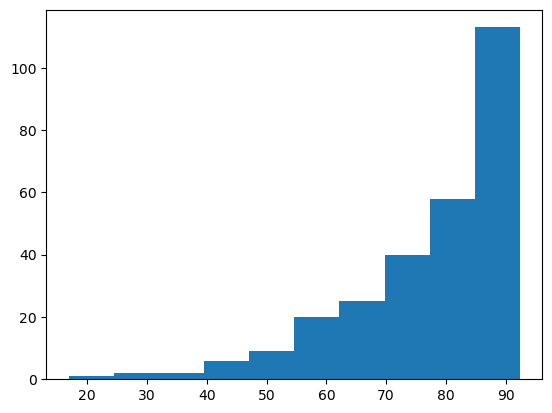

In [19]:
from matplotlib import pyplot as plt

plt.hist(accuracies)
plt.show()

In [24]:
df_final["accOCR"] = df_final["accOCR"].str.replace(",", ".").astype(float)

In [26]:
df_final.head()

,siren,pagenumber,text,tableau_f_et_p,accOCR,tableauPDF
0,5820378,1,RCS : AMIENS Code greffe : 8002 Documents comp...,0,85.776467,1
1,5820378,2,GREFFE DU TRIBUNAL DE COMMERCE …… D'AMIENS Dat...,0,91.648514,1
2,5820378,3,...,0,NaN,1
3,5820378,4,...,0,NaN,1
4,5820378,5,...,0,NaN,1


In [35]:
list(df_final[(df_final.tableau_f_et_p == 1) & (df_final.accOCR < 40)].text.head(1))

['Liste des filiales et participations —N VALEUR rretset | ertious | 2mres ONNDENCES nOuvEau JÉVOTEPAR QU Coppragce | PYAMES |avaus uerines | DAFARES | RESULTATS OU |ENCAISIES PAR lacant CAPTAL CONSENSEPAR HORS TAXES OU| | DERNER LA 3TEAU CŒTEN: CEsTSTRES LA STEET NON DERNER ÉXERCICE CLCS COORS DE affectatuon du LETENUS z resufati RE OURIES sTÈpes DERCCE L\'OCACICE LES ET PARTCPATICNS OBSERVATIONS CRETEIL INONERATION ENERGE PIc oemas (aeaTres dDUEE ; ; 38 422-<EF É IATHEF “AP … QUENALAO < 3030 AS1CM005 *rEF 16EF SP CDT ETEAFTÆE E D173 EUR VALESPACE srrr nceg0 20 m Esere PE sitoie - e œ e S c 2H£LP Uroupe REBUTS SOULES caraness Eces. 422 R23I UE Ds TIVIE 15en -ES-TAD CYCLERVAL UX Aecacca CeceBsmess Carta qaures .r —. "s ce ‘ - saca uE 22 pebsdetrect e A23147 83 ! *x U ELE : ; sm SREF ross Eass POCISEHFE TS ESAME 1:z0 < ders Ba-tra. s2 cu CE A Pececetreez cole HEF . 8 EF T EF Ç TI IH ER SU HEF 2HEM HD YL0ESS BAIT FAUL vocteus 10ELE r SREN 445 cI a® CICŒWE ver urr "s08 =-Fc n es e Ac23147

In [33]:
list(df_final[(df_final.tableau_f_et_p == 1) & (df_final.accOCR > 90)].text.head(1))

["Valeur comptable Dividende des titres s Prêtset Montant Chiffre encaissés Quote-part avances des d’affaires Résultat au cours (en milliers Autres du capital consentis garanties du dernier du dernier de d'euros) Capital capitaux détenu Brute Nette ennet données exercice exercice l’exercice Sodexo Holdings Ltd 419 197 7775 100,00% 555305 555305 - 1 104 - - 140700 Sodexo do Brasil Comercial SA 119 991 221 377 98,558% 446729 446 729 27 207 9062 625785 25 476 - Sodexo Beteiligungs BV & Co. KG 192 178290 100,00% 195456 195456 - - - 5035 - Sodexo Australia Pty Ltd 96838 (51606) 10000% 117928 117928 - 23 600 72516 (13716) - Novae Holding SA 229 84 _ 100,00% 112045 112045 - - - 302 - Sodexo Food Solutions India Private Limited 12 177 (4606) 100,00% 110442 110442 - - 117610 883 - Sodexo AB 10 000 31727 100,00% 101264 101 264 - - 344 431 7537 - Sodexo Services Asia 86 466 23823 _ 100,00 % 89 462 89 462 - 27 184 - 4 134 16 314 Sodexo Nederland B.V. 45 25205 100,00 % 80 435 80 435 - 800 274256 (2

In [34]:
list(df_final[(df_final.tableau_f_et_p == 1) & (df_final.accOCR.isna())].text.head(1))

["                                          LAFARGEHOLCIM CIMENTS\r\r\n                                            Etats Financiers au 31/12/2019\r\r\n                                                       en Euros\r\r\n                                              Filiales et participations\r\r\n Dénomination                             Capital      Q.P. Détenue Val. brute Titres Prêts, avances Chiffre d'affaires\r\r\n Siège Social                        Capitaux Propres Divid.encaiss. Val. nette Titres   Cautions        Résultat\r\r\nFILIALES (plus de 50%)\r\r\nSTE AQUITAINE DE TRANSFORMATION             10 000 000              100     11 277 000                        1 678 000\r\r\n                                            10 678 295                      11 277 000                           68 396\r\r\nSTE DE PROMOTION INDUSTRIELLE               16 044 800              100     18 216 554     14 542 552         3 779 467\r\r\n                                            14 735 623 

In [36]:
clean_page_content(list(df_final[(df_final.tableau_f_et_p == 1) & (df_final.accOCR < 40)].text.head(1))[0])

'list filial particip valeur rretset ertious 2mre onndenc nouveau jevotepar coppragc pyam avaus uerin dafar resultat encais lac captal consensepar hor tax dern 3teau coeten ceststr steet non dern exercic clc coor affectatuon letenus z resufat re ouri step dercc ocacic partcpaticn observ creteil inoner energ pic oem aeatr ddue 38 422 ef e iathef ap quenalao 3030 as1cm005 ref 16ef sp cdt eteaftae e d173 eur valespac srrr nceg0 20 eser pe sitoi e oe e 2h lp uroup rebut soul caraness ece 422 r23i ue d tiv 15en tad cyclerval ux aecacc cecebsmess cart qaur r sac ue 22 pebsdetrect e a23147 83 x u ele sm sref ross eass pocisehf t esam 1 z0 der ba tra s2 cu a pececetre col hef 8 ef ef c ti ih er su hef 2hem hd yl0ess bait faul vocteus 10el r sren 445 ci a cicoew ver urr s08 fc e ac2314703 2850 lertaa rrz cuptr 3x8r efe cros arur i rasez ernte e e re ue tr se ss ea si fec a itaish elr pefen d24474u 5 7 3 s45helr 3772 rr taa cyclerg v fratoi caecus 42 put as5su0c sit ep di he st i 16 a nelr iit e

In [37]:
clean_page_content(list(df_final[(df_final.tableau_f_et_p == 1) & (df_final.accOCR > 90)].text.head(1))[0])

'valeur comptabl dividend titr pretset mont chiffr encaiss quot part avanc affair resultat cour milli autr capital consent garant derni derni euros capital capital detenu brut net ennet don exercic exercic exercic sodexo holding ltd 419 197 7775 100 00 555305 555305 1 104 140700 sodexo do brasil comercial 119 991 221 377 98 558 446729 446 729 27 207 9062 625785 25 476 sodexo beteiligung bv co kg 192 178290 100 00 195456 195456 5035 sodexo australi pty ltd 96838 51606 10000 117928 117928 23 600 72516 13716 nova holding 229 84 _ 100 00 112045 112045 302 sodexo food solut indi privat limited 12 177 4606 100 00 110442 110442 117610 883 sodexo ab 10 000 31727 100 00 101264 101 264 344 431 7537 sodexo servic asi 86 466 23823 _ 100 00 89 462 89 462 27 184 4 134 16 314 sodexo nederland b v 45 25205 100 00 80 435 80 435 800 274256 23734 compagn financi auror international 58010 210516 68 920 68 920 517 sodexo belgium 16 765 22 277 98 54 43 428 43 428 3957 328889 1699 1 867 sodexo iberi 3 467 14

In [38]:
clean_page_content(list(df_final[(df_final.tableau_f_et_p == 1) & (df_final.accOCR.isna())].text.head(1))[0])

'lafargeholcim ciment etat financi 31 12 2019 euros filial particip denomin capital q p detenu val brut titr pret avanc chiffr affair sieg social capital propr divid encaiss val net titr caution resultat filial plus 50 ste aquitain transform 10 000 000 100 11 277 000 1 678 000 10 678 295 11 277 000 68 396 ste promot industriel 16 044 800 100 18 216 554 14 542 552 3 779 467 14 735 623 18 216 554 1 071 220 nord broyag 7 250 000 100 59 850 000 4 802 803 11 389 927 29 850 000 81 159 coder 200 000 100 300 000 622 510 267 688 cemwest 2 200 000 100 3 435 000 1 350 000 2 913 868 3 435 000 145 545 vrac ouest 21 000 100 4 100 001 43 200 714 089 623 701 particip 10 50 flandr laiti moulus 800 000 49 411 825 4 707 989 938 484 411 825 579 553 scor 1 092 800 13 94 172 377 172 377 beton chanti martigu 98 800 50 62 885 2 167 007 612 754 46 083 ciment antill 3 301 259 10 16 661 648 52 353 690 14 237 109 661 648 4 781 163 0 00 0 00 autr particip lafargeholcim distribu 17 340 920 0 23 43 423 702 951 706 4

In [12]:
from utils import clean_page_content
for content in list(df_final[df_final["tableau_f_et_p"] == 1].text):
    print(clean_page_content(content))

lto1 14b tableau filial particip million euros filial detenu 50 fnac darty particip servic darty limited fnac luxembourg cop certifi conform pg 29 06 2020 14 15 20 depot 2020 8525 055800296 capital 325 0 155 6 0 03 capital propr hor capital resultat 232 2 8 6 0 0 quot part capital detenu 99 99 100 100 valeur comptabl titr detenus brut 838 4 1116 8 0 0 net 838 4 1116 8 0 0 pret consent fnac darty non encor rembours 354 9 0 0 0 0 pag 19 27 mont caution aval don fnac darty 0 0 0 0 0 0 dividend chiffr _ benefic affair pert encaiss ht spar derni derni fnac exercic exercic dartyau ecoul clos cour 3 832 3 134 3 0 0 0 0 1 3 0 0 1 8 0 5 0 0 3
effect moyen represent moyen personnel present fin chaqu trimestr comprend personnel etabl sodexo a franc metropolitain depart region outr mer 24 consolid sodexo a consolid compt belion dont sieg social situ 17 19 plac resist issy moulineau compt consolid group sodexo present chapitr 3 docu enregistr universel 25 post clotur aucun even signif intervenu ent